# AI 600 - Assignment 1:#

**Name: Muhammad Adnan** 
**Roll Number: 25280067**

# MLP Implementation #

In [1]:
import numpy as np
import pandas as pd

In [2]:

X_train = pd.read_csv("data/processed/X_train_processed.csv").values
X_val = pd.read_csv("data/processed/X_val_processed.csv").values

y_train = pd.read_csv("data/processed/y_train.csv").values.flatten()
y_val = pd.read_csv("data/processed/y_val.csv").values.flatten()

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Train shape: (32532, 14)
Validation shape: (8133, 14)


In [3]:
def one_hot(y, num_classes):
    one_hot_matrix = np.zeros((len(y), num_classes))
    one_hot_matrix[np.arange(len(y)), y] = 1
    return one_hot_matrix

num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)
y_train_oh = one_hot(y_train, num_classes)
y_val_oh = one_hot(y_val, num_classes)
print("One-hot target shape:", y_train_oh)

print("One-hot target shape:", y_train_oh.shape)


Number of classes: 4
One-hot target shape: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
One-hot target shape: (32532, 4)


In [4]:
print("Input dimension:", X_train.shape[1])
print("Unique classes:", np.unique(y_train))
print("Number of classes:", len(np.unique(y_train)))

Input dimension: 14
Unique classes: [0 1 2 3]
Number of classes: 4


# *MLP Implementation* #

In [5]:
# Layers and Dimensions

ip_dim = X_train.shape[1]  # should be 14
h1_dim = 64
h2_dim = 32
op_dim = len(np.unique(y_train))  # should be 4


print("\nArchitecture:")
print("Input:", ip_dim)
print("Hidden 1:", h1_dim)
print("Hidden 2:", h2_dim)
print("Output:", op_dim)


Architecture:
Input: 14
Hidden 1: 64
Hidden 2: 32
Output: 4


In [6]:
def initialize_parameters(ip_dim, h1_dim, h2_dim, op_dim):
    np.random.seed(42)
    
    W1 = np.random.randn(ip_dim, h1_dim) * np.sqrt(2.0 / ip_dim)
    b1 = np.zeros((1, h1_dim))
    
    W2 = np.random.randn(h1_dim, h2_dim) * np.sqrt(2.0 / h1_dim)
    b2 = np.zeros((1, h2_dim))
    
    W3 = np.random.randn(h2_dim, op_dim) * np.sqrt(2.0 / h2_dim)
    b3 = np.zeros((1, op_dim))
    
    return W1, b1, W2, b2, W3, b3

In [7]:
# def initialize_parameters_xavier(input_dim, hidden1_dim, hidden2_dim, output_dim):
    
#     np.random.seed(42)
    
#     # Xavier for layer 1
#     W1 = np.random.randn(input_dim, hidden1_dim) * np.sqrt(2 / (input_dim + hidden1_dim))
#     b1 = np.zeros((1, hidden1_dim))
    
#     # Xavier for layer 2
#     W2 = np.random.randn(hidden1_dim, hidden2_dim) * np.sqrt(2 / (hidden1_dim + hidden2_dim))
#     b2 = np.zeros((1, hidden2_dim))
    
#     # Xavier for output
#     W3 = np.random.randn(hidden2_dim, output_dim) * np.sqrt(2 / (hidden2_dim + output_dim))
#     b3 = np.zeros((1, output_dim))
    
#     return W1, b1, W2, b2, W3, b3


In [8]:
W1, b1, W2, b2, W3, b3 = initialize_parameters(
    ip_dim, h1_dim, h2_dim, op_dim
)

print("W1 shape:", W1.shape)
print("W2 shape:", W2.shape)
print("W3 shape:", W3.shape)


W1 shape: (14, 64)
W2 shape: (64, 32)
W3 shape: (32, 4)


In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) 
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [10]:
test_input = np.random.randn(5, h1_dim)

print("Sigmoid output shape:", sigmoid(test_input).shape)
print("ReLU output shape:", relu(test_input).shape)
print("Softmax output shape:", softmax(np.random.randn(5, op_dim)).shape)


Sigmoid output shape: (5, 64)
ReLU output shape: (5, 64)
Softmax output shape: (5, 4)


In [11]:
def forward_pass(X, W1, b1, W2, b2, W3, b3, activation="sigmoid"):
    
    # Layer 1
    z1 = X @ W1 + b1
    
    if activation == "sigmoid":
        a1 = sigmoid(z1)
    elif activation == "relu":
        a1 = relu(z1)
    else:
        raise ValueError("Activation must be 'sigmoid' or 'relu'")
    
    # Layer 2
    z2 = a1 @ W2 + b2
    
    if activation == "sigmoid":
        a2 = sigmoid(z2)
    elif activation == "relu":
        a2 = relu(z2)
    
    # Output layer
    z3 = a2 @ W3 + b3
    y_hat = softmax(z3)
    
    # Store everything needed for backprop
    cache = {
        "X": X,
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2,
        "z3": z3,
        "y_hat": y_hat
    }
    
    return y_hat, cache


In [12]:
y_hat, cache = forward_pass(
    X_train,
    W1, b1, W2, b2, W3, b3,
    activation="sigmoid"
)

print("Output shape:", y_hat.shape)


Output shape: (32532, 4)


In [13]:
def loss_function(y_true, y_hat):
    """
    y_true: one-hot encoded labels (N, 4)
    y_hat: softmax output (N, 4)
    """
    
    N = y_true.shape[0]
    
    # Clip to prevent log(0)
    epsilon = 1e-15
    y_hat_clipped = np.clip(y_hat, epsilon, 1 - epsilon)
    
    loss = -np.sum(y_true * np.log(y_hat_clipped)) / N
    
    return loss


In [14]:
y_hat, _ = forward_pass(
    X_train, W1, b1, W2, b2, W3, b3,
    activation="sigmoid"
)

loss = loss_function(y_train_oh, y_hat)
print("Initial loss:", loss)


Initial loss: 2.1279853168719454


In [15]:
def backprop(y_true, cache, W1, W2, W3, activation="sigmoid"):
    
    X = cache["X"]
    z1 = cache["z1"]
    a1 = cache["a1"]
    z2 = cache["z2"]
    a2 = cache["a2"]
    y_hat = cache["y_hat"]
    
    N = X.shape[0]
    
    # ----- Output layer -----
    dZ3 = y_hat - y_true
    dW3 = (a2.T @ dZ3) / N
    db3 = np.sum(dZ3, axis=0, keepdims=True) / N
    
    # ----- Hidden layer 2 -----
    dA2 = dZ3 @ W3.T
    
    if activation == "sigmoid":
        dZ2 = dA2 * sigmoid_derivative(a2)
    elif activation == "relu":
        dZ2 = dA2 * relu_derivative(z2)
    
    dW2 = (a1.T @ dZ2) / N
    db2 = np.sum(dZ2, axis=0, keepdims=True) / N
    
    # ----- Hidden layer 1 -----
    dA1 = dZ2 @ W2.T
    
    if activation == "sigmoid":
        dZ1 = dA1 * sigmoid_derivative(a1)
    elif activation == "relu":
        dZ1 = dA1 * relu_derivative(z1)
    
    dW1 = (X.T @ dZ1) / N
    db1 = np.sum(dZ1, axis=0, keepdims=True) / N
    
    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,
        "dW3": dW3,
        "db3": db3
    }
    
    return gradients


In [16]:
y_hat, cache = forward_pass(
    X_train, W1, b1, W2, b2, W3, b3,
    activation="sigmoid"
)

grads = backprop(y_train_oh, cache, W1, W2, W3, activation="sigmoid")

print("dW1 shape:", grads["dW1"].shape)
print("dW2 shape:", grads["dW2"].shape)
print("dW3 shape:", grads["dW3"].shape)


dW1 shape: (14, 64)
dW2 shape: (64, 32)
dW3 shape: (32, 4)


In [17]:
def update_params(W1, b1, W2, b2, W3, b3, gradients, learning_rate):
    
    W1 -= learning_rate * gradients["dW1"]
    b1 -= learning_rate * gradients["db1"]
    
    W2 -= learning_rate * gradients["dW2"]
    b2 -= learning_rate * gradients["db2"]
    
    W3 -= learning_rate * gradients["dW3"]
    b3 -= learning_rate * gradients["db3"]
    
    return W1, b1, W2, b2, W3, b3


In [18]:
def compute_accuracy(X, y_true, W1, b1, W2, b2, W3, b3, activation):
    y_hat, _ = forward_pass(X, W1, b1, W2, b2, W3, b3, activation)
    predictions = np.argmax(y_hat, axis=1)
    accuracy = np.mean(predictions == y_true)
    
    return accuracy


In [19]:
def train_network(X_train, y_train_oh, y_train,
                  X_val, y_val_oh, y_val,
                  activation="sigmoid",
                  learning_rate=0.1,
                  iterations=200):
    
    # Initialize parameters
    W1, b1, W2, b2, W3, b3 = initialize_parameters(ip_dim, h1_dim, h2_dim, op_dim)
    
    train_acc_list = []
    val_acc_list = []
    loss_list = []
    
    for i in range(iterations):
        
        # Forward pass
        y_hat, cache = forward_pass(
            X_train, W1, b1, W2, b2, W3, b3,
            activation
        )
        
        # Compute loss
        loss = loss_function(y_train_oh, y_hat)
        
        # Backward pass
        gradients = backprop(
            y_train_oh, cache,
            W1, W2, W3,
            activation
        )
        
        # Update parameters - FIXED: correct function name
        W1, b1, W2, b2, W3, b3 = update_params(
            W1, b1, W2, b2, W3, b3,
            gradients,
            learning_rate
        )
        
        # Track metrics
        train_acc = compute_accuracy(
            X_train, y_train,
            W1, b1, W2, b2, W3, b3,
            activation
        )
        
        val_acc = compute_accuracy(
            X_val, y_val,
            W1, b1, W2, b2, W3, b3,
            activation
        )
        
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        loss_list.append(loss)
        
        # Print occasionally and at the last iteration
        if i % 20 == 0 or i == iterations - 1:
            print(f"Iteration {i} | Loss: {loss:.4f} | "
                  f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
    
    return W1, b1, W2, b2, W3, b3, train_acc_list, val_acc_list, loss_list

In [20]:
print("Training with Sigmoid Activation...")
W1_s, b1_s, W2_s, b2_s, W3_s, b3_s, train_acc_sigmoid, val_acc_sigmoid, loss_sigmoid = train_network(
    X_train, y_train_oh, y_train,
    X_val, y_val_oh, y_val,
    activation="sigmoid",
    learning_rate=0.01,
    iterations=200
)
print(f"\nFinal Sigmoid - Train Acc: {train_acc_sigmoid[-1]:.4f}, Val Acc: {val_acc_sigmoid[-1]:.4f}")

Training with Sigmoid Activation...
Iteration 0 | Loss: 2.1280 | Train Acc: 0.0648 | Val Acc: 0.0648
Iteration 20 | Loss: 1.3660 | Train Acc: 0.2369 | Val Acc: 0.2362
Iteration 40 | Loss: 1.1780 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 60 | Loss: 1.1332 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 80 | Loss: 1.1175 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 100 | Loss: 1.1092 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 120 | Loss: 1.1037 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 140 | Loss: 1.0995 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 160 | Loss: 1.0960 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 180 | Loss: 1.0929 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 199 | Loss: 1.0902 | Train Acc: 0.5618 | Val Acc: 0.5619

Final Sigmoid - Train Acc: 0.5618, Val Acc: 0.5619


In [21]:
print("\nTraining with ReLU Activation...")
W1_r, b1_r, W2_r, b2_r, W3_r, b3_r, train_acc_relu, val_acc_relu, loss_relu = train_network(
    X_train, y_train_oh, y_train,
    X_val, y_val_oh, y_val,
    activation="relu",
    learning_rate=0.01,
    iterations=200
)
print(f"\nFinal ReLU - Train Acc: {train_acc_relu[-1]:.4f}, Val Acc: {val_acc_relu[-1]:.4f}")


Training with ReLU Activation...
Iteration 0 | Loss: 2.2825 | Train Acc: 0.0982 | Val Acc: 0.0957
Iteration 20 | Loss: 1.3763 | Train Acc: 0.3226 | Val Acc: 0.3114
Iteration 40 | Loss: 1.1631 | Train Acc: 0.5273 | Val Acc: 0.5276
Iteration 60 | Loss: 1.0585 | Train Acc: 0.5784 | Val Acc: 0.5858
Iteration 80 | Loss: 0.9832 | Train Acc: 0.6041 | Val Acc: 0.6123
Iteration 100 | Loss: 0.9226 | Train Acc: 0.6488 | Val Acc: 0.6556
Iteration 120 | Loss: 0.8721 | Train Acc: 0.6761 | Val Acc: 0.6836
Iteration 140 | Loss: 0.8298 | Train Acc: 0.6903 | Val Acc: 0.6943
Iteration 160 | Loss: 0.7937 | Train Acc: 0.6972 | Val Acc: 0.7007
Iteration 180 | Loss: 0.7620 | Train Acc: 0.7043 | Val Acc: 0.7076
Iteration 199 | Loss: 0.7347 | Train Acc: 0.7099 | Val Acc: 0.7122

Final ReLU - Train Acc: 0.7099, Val Acc: 0.7122


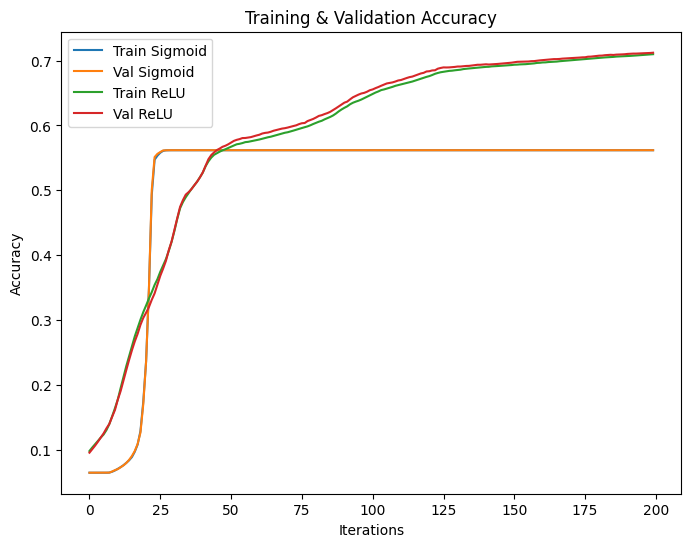

In [22]:
# Comparison Plot: Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.plot(train_acc_sigmoid, label="Train Sigmoid")
plt.plot(val_acc_sigmoid, label="Val Sigmoid")

plt.plot(train_acc_relu, label="Train ReLU")
plt.plot(val_acc_relu, label="Val ReLU")

plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.show()


In [23]:
def train_with_grad_tracking(X_train, y_train_oh, y_train,
                             X_val, y_val_oh, y_val,
                             activation="sigmoid",
                             learning_rate=0.1,
                             iterations=200):
    
    W1, b1, W2, b2, W3, b3 = initialize_parameters(ip_dim, h1_dim, h2_dim, op_dim)
    
    train_acc_list = []
    val_acc_list = []
    loss_list = []
    grad_W1_list = []
    grad_W2_list = []
    grad_W3_list = []
    
    for i in range(iterations):
        y_hat, cache = forward_pass(X_train, W1, b1, W2, b2, W3, b3, activation)
        loss = loss_function(y_train_oh, y_hat)
        gradients = backprop(y_train_oh, cache, W1, W2, W3, activation)
        
        # Track gradient magnitudes
        grad_W1_list.append(np.mean(np.abs(gradients["dW1"])))
        grad_W2_list.append(np.mean(np.abs(gradients["dW2"])))
        grad_W3_list.append(np.mean(np.abs(gradients["dW3"])))
        
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, gradients, learning_rate)
        
        train_acc = compute_accuracy(X_train, y_train, W1, b1, W2, b2, W3, b3, activation)
        val_acc = compute_accuracy(X_val, y_val, W1, b1, W2, b2, W3, b3, activation)
        
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        loss_list.append(loss)
        
        if i % 20 == 0 or i == iterations - 1:
            print(f"Iteration {i} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
    
    return (W1, b1, W2, b2, W3, b3, train_acc_list, val_acc_list, loss_list, 
            grad_W1_list, grad_W2_list, grad_W3_list)


In [24]:
# Train both networks with gradient tracking
print("Training with Gradient Tracking...")
print("\n--- Sigmoid ---")
results_sigmoid = train_with_grad_tracking(
    X_train, y_train_oh, y_train,
    X_val, y_val_oh, y_val,
    activation="sigmoid",
    learning_rate=0.01,
    iterations=200
)

print("\n--- ReLU ---")
results_relu = train_with_grad_tracking(
    X_train, y_train_oh, y_train,
    X_val, y_val_oh, y_val,
    activation="relu",
    learning_rate=0.01,
    iterations=200
)

print("\nGradient tracking complete!")

Training with Gradient Tracking...

--- Sigmoid ---
Iteration 0 | Loss: 2.1280 | Train Acc: 0.0648 | Val Acc: 0.0648
Iteration 20 | Loss: 1.3660 | Train Acc: 0.2369 | Val Acc: 0.2362
Iteration 40 | Loss: 1.1780 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 60 | Loss: 1.1332 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 80 | Loss: 1.1175 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 100 | Loss: 1.1092 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 120 | Loss: 1.1037 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 140 | Loss: 1.0995 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 160 | Loss: 1.0960 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 180 | Loss: 1.0929 | Train Acc: 0.5618 | Val Acc: 0.5619
Iteration 199 | Loss: 1.0902 | Train Acc: 0.5618 | Val Acc: 0.5619

--- ReLU ---
Iteration 0 | Loss: 2.2825 | Train Acc: 0.0982 | Val Acc: 0.0957
Iteration 20 | Loss: 1.3763 | Train Acc: 0.3226 | Val Acc: 0.3114
Iteration 40 | Loss: 1.1631 | Train Acc: 0.5273 | Val Acc: 0.5276
Iterat

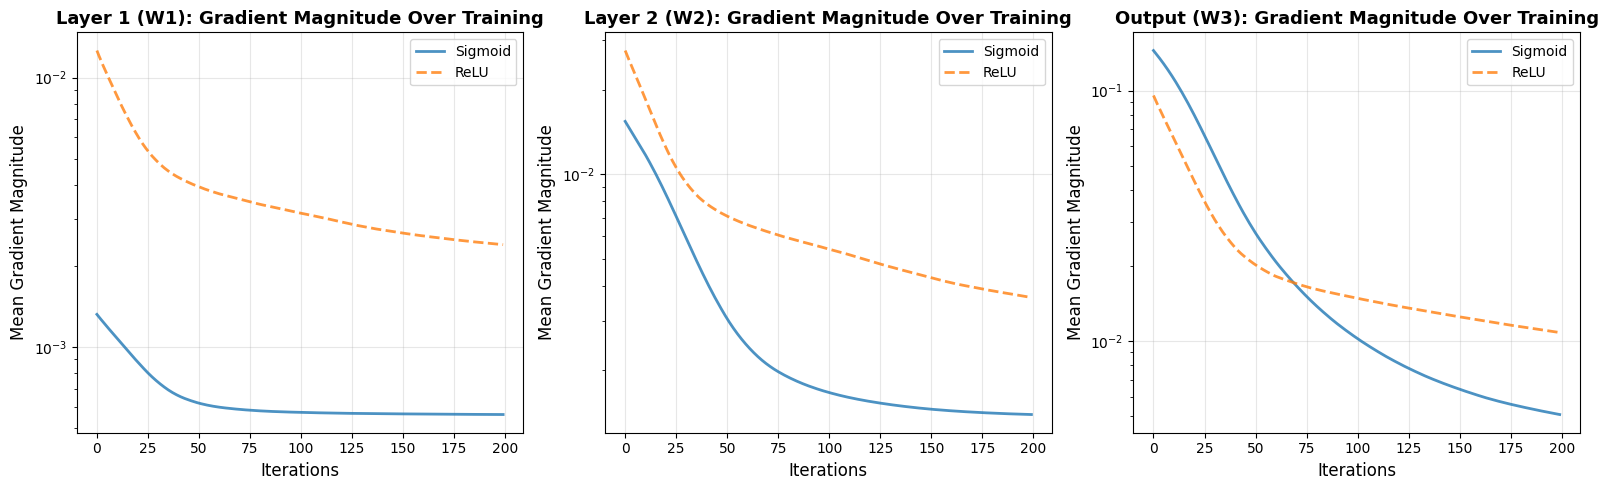


GRADIENT ANALYSIS
Sigmoid - Final Layer 1 grad: 5.62e-04
Sigmoid - Final Layer 2 grad: 1.39e-03
Sigmoid - Final Output grad:  5.09e-03

ReLU    - Final Layer 1 grad: 2.40e-03
ReLU    - Final Layer 2 grad: 3.63e-03
ReLU    - Final Output grad:  1.08e-02
Note: Sigmoid shows much smaller gradients (vanishing gradient problem)


In [25]:
# Extract gradient magnitudes
grad_W1_sigmoid = results_sigmoid[9]
grad_W2_sigmoid = results_sigmoid[10]
grad_W3_sigmoid = results_sigmoid[11]

grad_W1_relu = results_relu[9]
grad_W2_relu = results_relu[10]
grad_W3_relu = results_relu[11]

# Plot gradient magnitudes in one figure
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Layer 1 (W1)
axes[0].plot(grad_W1_sigmoid, label='Sigmoid', linewidth=2, linestyle='-', alpha=0.8)
axes[0].plot(grad_W1_relu, label='ReLU', linewidth=2, linestyle='--', alpha=0.8)
axes[0].set_xlabel('Iterations', fontsize=12)
axes[0].set_ylabel('Mean Gradient Magnitude', fontsize=12)
axes[0].set_title('Layer 1 (W1): Gradient Magnitude Over Training', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')

# Layer 2 (W2)
axes[1].plot(grad_W2_sigmoid, label='Sigmoid', linewidth=2, linestyle='-', alpha=0.8)
axes[1].plot(grad_W2_relu, label='ReLU', linewidth=2, linestyle='--', alpha=0.8)
axes[1].set_xlabel('Iterations', fontsize=12)
axes[1].set_ylabel('Mean Gradient Magnitude', fontsize=12)
axes[1].set_title('Layer 2 (W2): Gradient Magnitude Over Training', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

# Output Layer (W3)
axes[2].plot(grad_W3_sigmoid, label='Sigmoid', linewidth=2, linestyle='-', alpha=0.8)
axes[2].plot(grad_W3_relu, label='ReLU', linewidth=2, linestyle='--', alpha=0.8)
axes[2].set_xlabel('Iterations', fontsize=12)
axes[2].set_ylabel('Mean Gradient Magnitude', fontsize=12)
axes[2].set_title('Output (W3): Gradient Magnitude Over Training', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("GRADIENT ANALYSIS")
print("="*70)
print(f"Sigmoid - Final Layer 1 grad: {grad_W1_sigmoid[-1]:.2e}")
print(f"Sigmoid - Final Layer 2 grad: {grad_W2_sigmoid[-1]:.2e}")
print(f"Sigmoid - Final Output grad:  {grad_W3_sigmoid[-1]:.2e}")
print()
print(f"ReLU    - Final Layer 1 grad: {grad_W1_relu[-1]:.2e}")
print(f"ReLU    - Final Layer 2 grad: {grad_W2_relu[-1]:.2e}")
print(f"ReLU    - Final Output grad:  {grad_W3_relu[-1]:.2e}")
print("="*70)
print("Note: Sigmoid shows much smaller gradients (vanishing gradient problem)")

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

test_df = pd.read_csv("data/raw/test.csv")

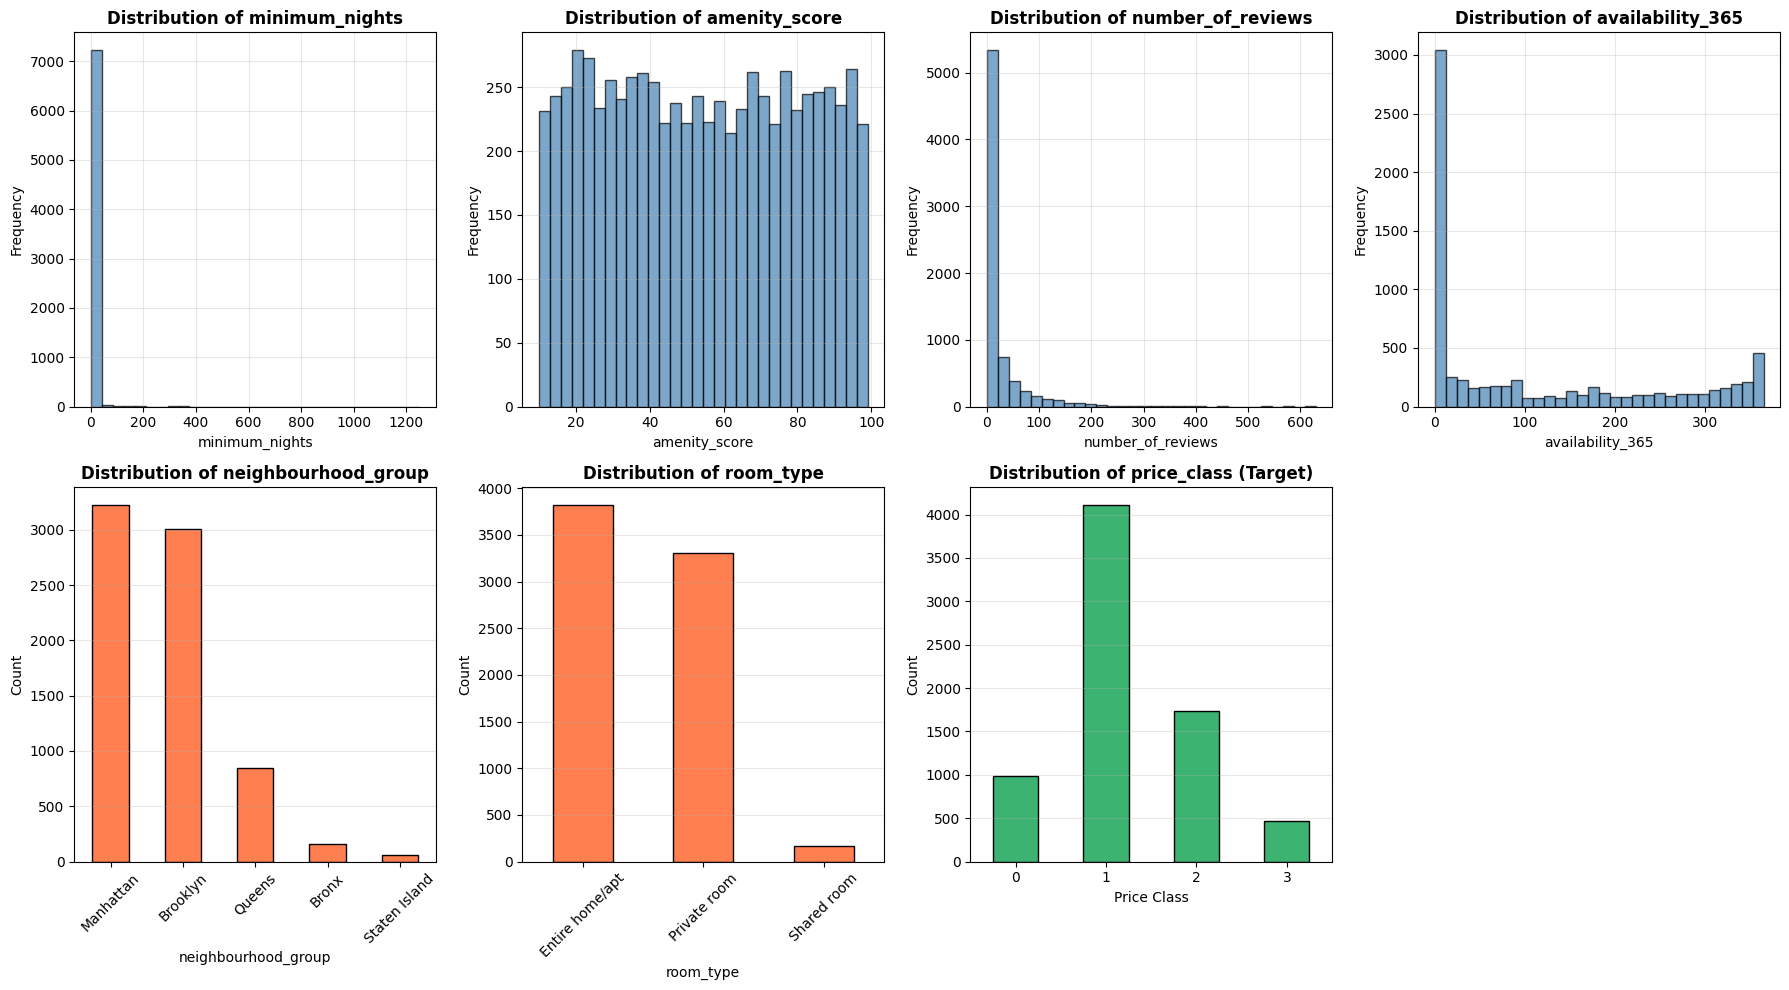


TEST DATA - SUMMARY STATISTICS

Numerical Features:
       minimum_nights  amenity_score  number_of_reviews  availability_365
count     7297.000000    7297.000000        7297.000000       7297.000000
mean         7.106756      54.151857          23.540770        113.006578
std         23.871693      25.845470          45.929467        131.358537
min          1.000000      10.000000           0.000000          0.000000
25%          1.000000      31.400000           1.000000          0.000000
50%          2.000000      53.800000           5.000000         46.000000
75%          5.000000      76.900000          23.000000        228.000000
max       1250.000000      99.000000         629.000000        365.000000

Categorical Features:

neighbourhood_group:
neighbourhood_group
Manhattan        3223
Brooklyn         3006
Queens            849
Bronx             163
Staten Island      56
Name: count, dtype: int64

room_type:
room_type
Entire home/apt    3819
Private room       3309
Shared roo

In [27]:
# Plot distribution of each feature in test data
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

numerical_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
categorical_cols = ['neighbourhood_group', 'room_type']

# Numerical features
for i, col in enumerate(numerical_cols):
    axes[i].hist(test_df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Categorical features
for i, col in enumerate(categorical_cols, start=len(numerical_cols)):
    test_df[col].value_counts().plot(kind='bar', ax=axes[i], color='coral', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3, axis='y')

# Target variable
test_df['price_class'].value_counts().sort_index().plot(kind='bar', ax=axes[6], 
                                                         color='mediumseagreen', edgecolor='black')
axes[6].set_title('Distribution of price_class (Target)', fontsize=12, fontweight='bold')
axes[6].set_xlabel('Price Class')
axes[6].set_ylabel('Count')
axes[6].tick_params(axis='x', rotation=0)
axes[6].grid(True, alpha=0.3, axis='y')

# Hide the last unused subplot
axes[7].axis('off')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("TEST DATA - SUMMARY STATISTICS")
print("="*70)
print("\nNumerical Features:")
print(test_df[numerical_cols].describe())
print("\nCategorical Features:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(test_df[col].value_counts())
print("\nTarget Variable (price_class):")
print(test_df['price_class'].value_counts().sort_index())
print("="*70)

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

test_df = pd.read_csv("data/raw/test.csv")

# numerical_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
# categorical_cols = ['neighbourhood_group', 'room_type']

train_df = pd.read_csv("data/raw/train.csv")
median_values = train_df[numerical_cols].median()

test_df[numerical_cols] = test_df[numerical_cols].fillna(median_values)
test_df[categorical_cols] = test_df[categorical_cols].fillna("Unknown")

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_df[categorical_cols].fillna("Unknown"))

X_test_encoded = encoder.transform(test_df[categorical_cols])

X_test_encoded_df = pd.DataFrame(
    X_test_encoded,
    columns=encoder.get_feature_names_out(categorical_cols)
)

scaler = StandardScaler()
scaler.fit(train_df[numerical_cols].fillna(median_values))

X_test_scaled = scaler.transform(test_df[numerical_cols])

X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=numerical_cols
)

X_test_final = pd.concat(
    [X_test_scaled_df, X_test_encoded_df],
    axis=1
)

X_test = X_test_final.values

print("Test shape:", X_test.shape)


Test shape: (7297, 14)


In [29]:
y_test = test_df["price_class"].values

test_accuracy_relu = compute_accuracy(X_test, y_test, W1_r, b1_r, W2_r, b2_r, W3_r, b3_r, activation="relu")
test_accuracy_sigmoid = compute_accuracy(X_test, y_test, W1_s, b1_s, W2_s, b2_s, W3_s, b3_s, activation="sigmoid")

print("Test Accuracy for ReLU:", test_accuracy_relu)
print("Test Accuracy for Sigmoid:", test_accuracy_sigmoid)

Test Accuracy for ReLU: 0.5439221597916952
Test Accuracy for Sigmoid: 0.5631081266273811


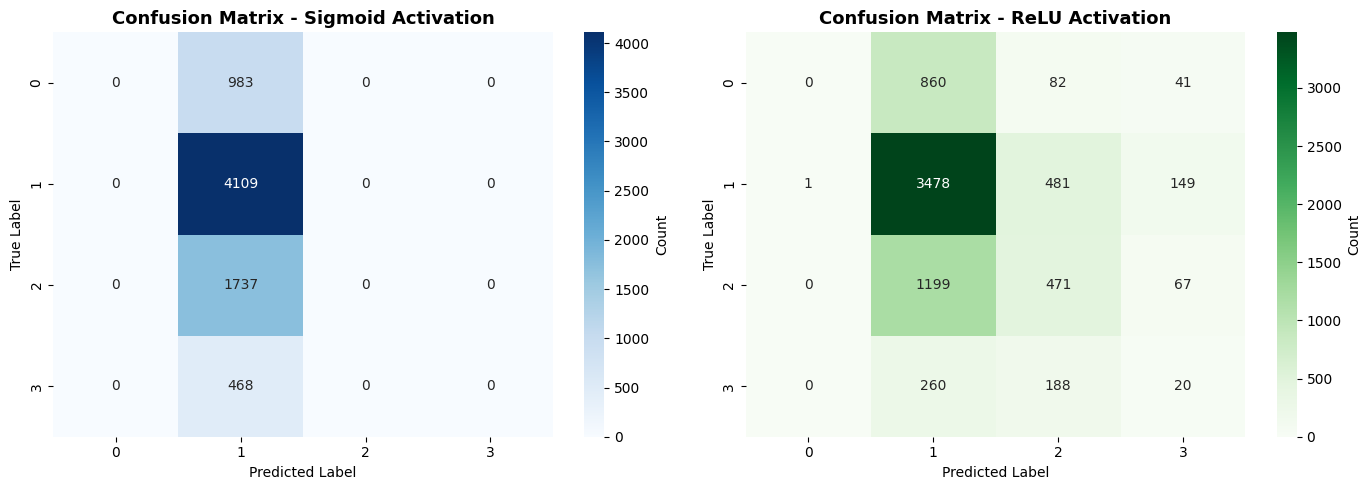


SIGMOID - CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       983
     Class 1       0.56      1.00      0.72      4109
     Class 2       0.00      0.00      0.00      1737
     Class 3       0.00      0.00      0.00       468

    accuracy                           0.56      7297
   macro avg       0.14      0.25      0.18      7297
weighted avg       0.32      0.56      0.41      7297


ReLU - CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       983
     Class 1       0.60      0.85      0.70      4109
     Class 2       0.39      0.27      0.32      1737
     Class 3       0.07      0.04      0.05       468

    accuracy                           0.54      7297
   macro avg       0.26      0.29      0.27      7297
weighted avg       0.43      0.54      0.47      7297



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions for both models
y_hat_sigmoid, _ = forward_pass(X_test, W1_s, b1_s, W2_s, b2_s, W3_s, b3_s, activation="sigmoid")
y_pred_sigmoid = np.argmax(y_hat_sigmoid, axis=1)

y_hat_relu, _ = forward_pass(X_test, W1_r, b1_r, W2_r, b2_r, W3_r, b3_r, activation="relu")
y_pred_relu = np.argmax(y_hat_relu, axis=1)

# Compute confusion matrices
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
cm_relu = confusion_matrix(y_test, y_pred_relu)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sigmoid confusion matrix
sns.heatmap(cm_sigmoid, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=range(4), yticklabels=range(4), cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Sigmoid Activation', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# ReLU confusion matrix
sns.heatmap(cm_relu, annot=True, fmt='d', cmap='Greens', ax=axes[1], 
            xticklabels=range(4), yticklabels=range(4), cbar_kws={'label': 'Count'})
axes[1].set_title('Confusion Matrix - ReLU Activation', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification reports
print("\n" + "="*70)
print("SIGMOID - CLASSIFICATION REPORT")
print("="*70)
print(classification_report(
    y_test, y_pred_sigmoid,
    target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
    zero_division=0
))

print("\n" + "="*70)
print("ReLU - CLASSIFICATION REPORT")
print("="*70)
print(classification_report(
    y_test, y_pred_relu,
    target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
    zero_division=0
) )

## Part B(b): Gradient Magnitude Analysis

### Key Observations:

#### **1. Vanishing Gradients in Sigmoid:**
- **Layer 1 (W1)**: Gradient magnitude ≈ 5.62×10⁻⁴ (extremely small)
- **Layer 2 (W2)**: Gradient magnitude ≈ 1.39×10⁻³ (small)
- **Output (W3)**: Gradient magnitude ≈ 5.09×10⁻³ (larger)

**Pattern**: Gradients **decrease** as we move backward through layers (left to right in backprop). Earlier layers receive much smaller gradient signals.

#### **2. Stable Gradients in ReLU:**
- **Layer 1 (W1)**: Gradient magnitude ≈ 2.40×10⁻³ (4-5x larger than Sigmoid)
- **Layer 2 (W2)**: Gradient magnitude ≈ 3.63×10⁻³ (similar scale across layers)
- **Output (W3)**: Gradient magnitude ≈ 1.08×10⁻² (more balanced across layers)

**Pattern**: ReLU maintains **consistent gradient magnitudes** across all layers.

### What This Reveals About Gradient Flow and Learning Dynamics:

#### **1. Sigmoid - The Vanishing Gradient Problem:**
- Sigmoid's derivative $(a(1-a))$ has maximum value of 0.25
- During backpropagation, gradients are multiplied by these small derivatives at each layer
- Result: Exponential decay of gradients moving backward → $\text{grad} \times 0.25 \times 0.25 \times 0.25 = 0.0156 \times \text{grad}$
- **Impact on learning**: Early layers receive negligible gradient signals, making weight updates impossible
- **Consequence**: Model cannot learn meaningful patterns in early layers, gets stuck at baseline (56% = majority class)

#### **2. ReLU - Superior Gradient Flow:**
- ReLU derivative is simply 1 (for $z > 0$) or 0 (for $z \leq 0$)
- No multiplicative attenuation: gradients flow back unchanged through active neurons
- Result: Gradients maintain magnitude across layers
- **Impact on learning**: All layers receive meaningful gradient signals
- **Consequence**: Model can learn complex hierarchical representations

#### **3. Deep Networks Implications:**
- **Sigmoid in Deep Networks**: Becomes practically unusable beyond 2-3 layers
- **ReLU in Deep Networks**: Enables training of very deep architectures (ResNet: 152+ layers)
- **Why it matters**: This is why modern deep learning uses ReLU variants (Leaky ReLU, ELU, GELU) instead of sigmoid for hidden layers

In [31]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, TensorDataset


In [32]:
import pandas as pd

# Load as DataFrame FIRST
X_train_df = pd.read_csv("data/processed/X_train_processed.csv")
X_val_df = pd.read_csv("data/processed/X_val_processed.csv")

y_train = pd.read_csv("data/processed/y_train.csv").values.flatten()
y_val = pd.read_csv("data/processed/y_val.csv").values.flatten()

# Extract feature names BEFORE converting to numpy
feature_names = X_train_df.columns.tolist()

# Now convert to numpy
X_train = X_train_df.values
X_val = X_val_df.values

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Number of features:", len(feature_names))


Train shape: (32532, 14)
Validation shape: (8133, 14)
Number of features: 14


In [33]:
# Cell 2: Convert numpy arrays to PyTorch tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)


input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

print("Input dimension:", input_dim)
print("Number of classes:", num_classes)


Input dimension: 14
Number of classes: 4


In [34]:
# two hidden layer MLP

class MLP(nn.Module):
    def __init__(
        self,
        input_dim: int,
        hidden1: int = 64,
        hidden2: int = 32,
        num_classes: int = 4,
        activation: str = "relu",
    ) -> None:
        super().__init__()

        self.fc1 = nn.Linear(input_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)

        activation = activation.lower()
        if activation == "relu":
            self.activation_fn = nn.ReLU()
        elif activation == "sigmoid":
            self.activation_fn = nn.Sigmoid()
        else:
            raise ValueError("activation must be 'relu' or 'sigmoid'")

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.activation_fn(self.fc1(x))
        x = self.activation_fn(self.fc2(x))
        x = self.fc3(x)  # No softmax (CrossEntropyLoss handles logits)
        return x


# Create separate model objects
model_relu = MLP(input_dim=input_dim, num_classes=num_classes, activation="relu")
model_sigmoid = MLP(input_dim=input_dim, num_classes=num_classes, activation="sigmoid")



In [35]:
# Loss & Optimizer

criteria = nn.CrossEntropyLoss()

dataset = TensorDataset(X_train_tensor, y_train_tensor)
loader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)

# Separate optimizers for both torch models
optimizers = {
    "relu": optim.Adam(model_relu.parameters(), lr=0.001),
    "sigmoid": optim.Adam(model_sigmoid.parameters(), lr=0.001),
}

# Cell 37 expects `model` and `optimizer`
# Set which model to train, then rerun Cell 37 for the other one.
model_name = "relu"  # change to "sigmoid" for the sigmoid model
model = model_relu if model_name == "relu" else model_sigmoid
optimizer = optimizers[model_name]


In [36]:
def train_one_model(model, optimizer, model_name, epochs=200):
    train_loss_hist, train_acc_hist, val_acc_hist = [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0

        for xb, yb in loader:
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criteria(outputs, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(loader)

        model.eval()
        with torch.no_grad():
            train_outputs = model(X_train_tensor)
            train_preds = torch.argmax(train_outputs, dim=1)
            train_acc = (train_preds == y_train_tensor).float().mean().item()

            val_outputs = model(X_val_tensor)
            val_preds = torch.argmax(val_outputs, dim=1)
            val_acc = (val_preds == y_val_tensor).float().mean().item()

        train_loss_hist.append(avg_loss)
        train_acc_hist.append(train_acc)
        val_acc_hist.append(val_acc)

        if (epoch + 1) % 10 == 0:
            print(
                f"[{model_name}] Epoch [{epoch+1}/{epochs}] | "
                f"Loss: {avg_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}"
            )

    return train_loss_hist, train_acc_hist, val_acc_hist

In [37]:
# Training (Sigmoid first, then ReLU)

epochs = 200

# # Reinitialize models so each run starts fresh
# model_sigmoid = MLP(input_dim=input_dim, num_classes=num_classes, activation="sigmoid")
# model_relu = MLP(input_dim=input_dim, num_classes=num_classes, activation="relu")

# optimizers = {
#     "sigmoid": optim.Adam(model_sigmoid.parameters(), lr=0.001),
#     "relu": optim.Adam(model_relu.parameters(), lr=0.001),
# }



print("Training SIGMOID model...")
loss_sigmoid_torch, train_acc_sigmoid_torch, val_acc_sigmoid_torch = train_one_model(
    model_sigmoid, optimizers["sigmoid"], "sigmoid", epochs=epochs
)

print("\nTraining RELU model...")
loss_relu_torch, train_acc_relu_torch, val_acc_relu_torch = train_one_model(
    model_relu, optimizers["relu"], "relu", epochs=epochs
)

# Keep ReLU as default for downstream cells that use `model`
model_name = "relu"
model = model_relu
optimizer = optimizers["relu"]


Training SIGMOID model...
[sigmoid] Epoch [10/200] | Loss: 1.3480 | Train Acc: 0.1348 | Val Acc: 0.1348
[sigmoid] Epoch [20/200] | Loss: 1.2195 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [30/200] | Loss: 1.1514 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [40/200] | Loss: 1.1211 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [50/200] | Loss: 1.1093 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [60/200] | Loss: 1.1037 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [70/200] | Loss: 1.0987 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [80/200] | Loss: 1.0926 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [90/200] | Loss: 1.0846 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [100/200] | Loss: 1.0740 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [110/200] | Loss: 1.0602 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [120/200] | Loss: 1.0424 | Train Acc: 0.5618 | Val Acc: 0.5619
[sigmoid] Epoch [130/200] | Loss: 1

In [38]:
# feature attribution

model.eval()

# Enable gradient tracking on inputs
X_for_grad = X_train_tensor.clone().detach().requires_grad_(True)

outputs = model(X_for_grad)
loss = criteria(outputs, y_train_tensor)

# Zero model gradients
model.zero_grad()

# Backprop to compute ∂L/∂X
loss.backward()

# Extract gradients wrt inputs
input_gradients = X_for_grad.grad  # shape: (N, num_features)

# Compute average absolute gradient per feature
feature_importance = torch.mean(torch.abs(input_gradients), dim=0)

feature_importance = feature_importance.detach().numpy()


In [39]:

# Create sorted ranking
ranking = sorted(
    zip(feature_names, feature_importance),
    key=lambda x: x[1],
    reverse=True
)

print("Feature Importance Ranking (Highest → Lowest):\n")

for i, (name, score) in enumerate(ranking, 1):
    print(f"{i:2d}. {name:30s} {score:.6f}")


Feature Importance Ranking (Highest → Lowest):

 1. amenity_score                  0.000030
 2. neighbourhood_group_Bronx      0.000009
 3. room_type_Entire home/apt      0.000009
 4. neighbourhood_group_Staten Island 0.000009
 5. neighbourhood_group_Brooklyn   0.000008
 6. neighbourhood_group_Manhattan  0.000008
 7. neighbourhood_group_Queens     0.000008
 8. room_type_Private room         0.000007
 9. neighbourhood_group_Unknown    0.000007
10. room_type_Shared room          0.000004
11. room_type_Unknown              0.000004
12. minimum_nights                 0.000004
13. availability_365               0.000003
14. number_of_reviews              0.000002


In [40]:
# Display top 5 features only (clean for report)

print("\nTop 5 Most Influential Features:\n")

for i, (name, score) in enumerate(ranking[:5], 1):
    print(f"{i}. {name:30s} {score:.6f}")



Top 5 Most Influential Features:

1. amenity_score                  0.000030
2. neighbourhood_group_Bronx      0.000009
3. room_type_Entire home/apt      0.000009
4. neighbourhood_group_Staten Island 0.000009
5. neighbourhood_group_Brooklyn   0.000008


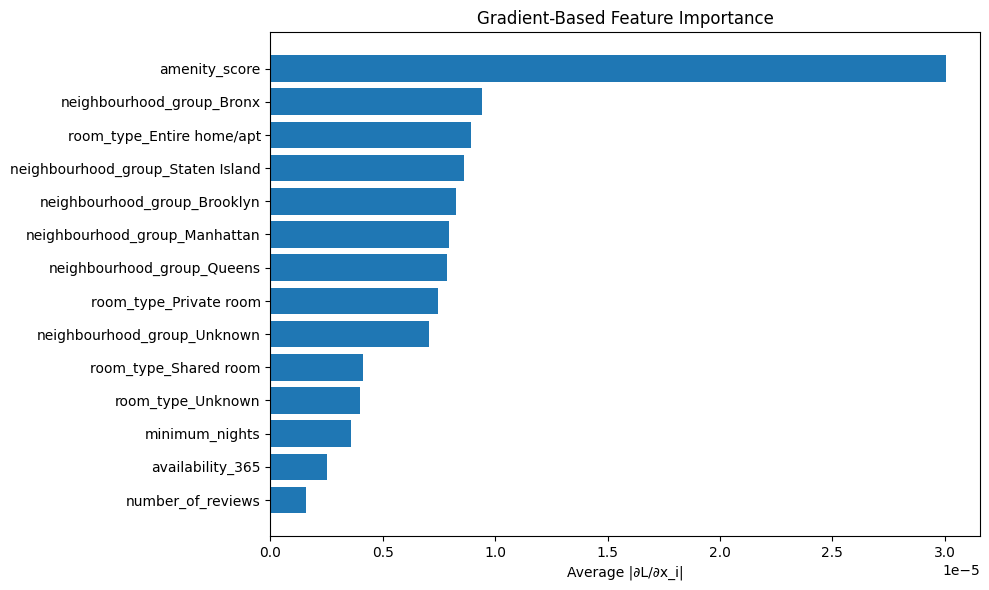

In [41]:
# Cell 8: Plot feature importance

plt.figure(figsize=(10,6))

sorted_features = [x[0] for x in ranking]
sorted_scores = [x[1] for x in ranking]

plt.barh(sorted_features[::-1], sorted_scores[::-1])
plt.xlabel("Average |∂L/∂x_i|")
plt.title("Gradient-Based Feature Importance")
plt.tight_layout()
plt.show()


In [42]:
# Optional normalization

normalized_importance = feature_importance / np.sum(feature_importance)

ranking_norm = sorted(zip(feature_names, normalized_importance),
                      key=lambda x: x[1],
                      reverse=True)

print("Normalized Importance Ranking:\n")
for name, score in ranking_norm:
    print(f"{name:40s} {score:.6f}")


Normalized Importance Ranking:

amenity_score                            0.269914
neighbourhood_group_Bronx                0.084486
room_type_Entire home/apt                0.080164
neighbourhood_group_Staten Island        0.077493
neighbourhood_group_Brooklyn             0.074201
neighbourhood_group_Manhattan            0.071462
neighbourhood_group_Queens               0.070692
room_type_Private room                   0.066940
neighbourhood_group_Unknown              0.063152
room_type_Shared room                    0.036972
room_type_Unknown                        0.035595
minimum_nights                           0.032227
availability_365                         0.022556
number_of_reviews                        0.014147


In [43]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ReLU test accuracy (default model for downstream cells)
model_relu.eval()
with torch.no_grad():
    test_outputs = model_relu(X_test_tensor)
    test_preds = torch.argmax(test_outputs, dim=1)
    test_acc_relu_torch = (test_preds == y_test_tensor).float().mean().item()

# Sigmoid test accuracy
model_sigmoid.eval()
with torch.no_grad():
    test_outputs_sigmoid = model_sigmoid(X_test_tensor)
    test_preds_sigmoid = torch.argmax(test_outputs_sigmoid, dim=1)
    test_acc_sigmoid_torch = (test_preds_sigmoid == y_test_tensor).float().mean().item()

# Keep existing name for compatibility with later cells
test_acc = test_acc_relu_torch

print(f"Test Accuracy (ReLU): {test_acc_relu_torch:.4f}")
print(f"Test Accuracy (Sigmoid): {test_acc_sigmoid_torch:.4f}")


Test Accuracy (ReLU): 0.5038
Test Accuracy (Sigmoid): 0.5779


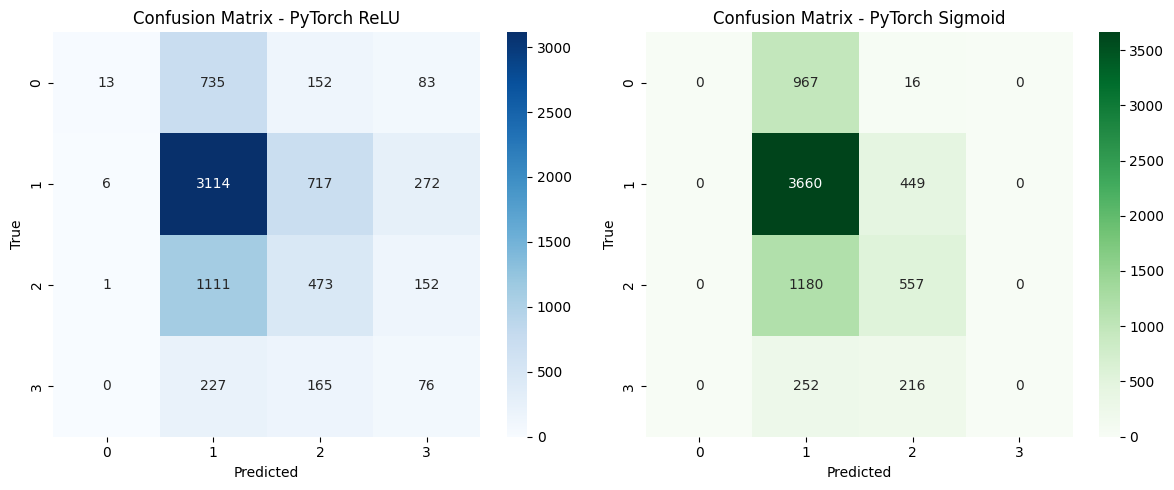

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_relu = confusion_matrix(y_test_tensor.numpy(), test_preds.numpy())
cm_sigmoid = confusion_matrix(y_test_tensor.numpy(), test_preds_sigmoid.numpy())

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(
    cm_relu, annot=True, fmt="d", cmap="Blues",
    xticklabels=["0", "1", "2", "3"],
    yticklabels=["0", "1", "2", "3"],
    ax=axes[0]
 )
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Confusion Matrix - PyTorch ReLU")

sns.heatmap(
    cm_sigmoid, annot=True, fmt="d", cmap="Greens",
    xticklabels=["0", "1", "2", "3"],
    yticklabels=["0", "1", "2", "3"],
    ax=axes[1]
 )
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title("Confusion Matrix - PyTorch Sigmoid")

plt.tight_layout()
plt.show()


In [45]:
# Accuracy comparison table
import pandas as pd

accuracy_table = pd.DataFrame({
    "Model": [
        "Custom MLP (Sigmoid)",
        "Custom MLP (ReLU)",
        "PyTorch MLP (ReLU)",
        "PyTorch MLP (Sigmoid)",
    ],
    "Test Accuracy": [
        test_accuracy_sigmoid,
        test_accuracy_relu,
        test_acc,
        test_acc_sigmoid_torch,
    ],
})

accuracy_table["Test Accuracy"] = accuracy_table["Test Accuracy"].round(4)
accuracy_table

,Model,Test Accuracy
0,Custom MLP (Sigmoid),0.5631
1,Custom MLP (ReLU),0.5439
2,PyTorch MLP (ReLU),0.5038
3,PyTorch MLP (Sigmoid),0.5779


In [46]:
from sklearn.metrics import classification_report

print("\nClassification Report (PyTorch ReLU):\n")
print(classification_report(
    y_test_tensor.numpy(),
    test_preds.numpy(),
    target_names=["Class 0", "Class 1", "Class 2", "Class 3"],
    zero_division=0
) )

print("\nClassification Report (PyTorch Sigmoid):\n")
print(classification_report(
    y_test_tensor.numpy(),
    test_preds_sigmoid.numpy(),
    target_names=["Class 0", "Class 1", "Class 2", "Class 3"],
    zero_division=0
) )



Classification Report (PyTorch ReLU):

              precision    recall  f1-score   support

     Class 0       0.65      0.01      0.03       983
     Class 1       0.60      0.76      0.67      4109
     Class 2       0.31      0.27      0.29      1737
     Class 3       0.13      0.16      0.14       468

    accuracy                           0.50      7297
   macro avg       0.42      0.30      0.28      7297
weighted avg       0.51      0.50      0.46      7297


Classification Report (PyTorch Sigmoid):

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       983
     Class 1       0.60      0.89      0.72      4109
     Class 2       0.45      0.32      0.37      1737
     Class 3       0.00      0.00      0.00       468

    accuracy                           0.58      7297
   macro avg       0.26      0.30      0.27      7297
weighted avg       0.45      0.58      0.49      7297

